In [108]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

In [5]:
import csv
with open('Data_part2/traindata.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('traindata.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)
with open('Data_part2/testdata.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('testdata.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)
with open('Data_part2/trainlabel.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('trainlabel.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)
with open('Data_part2/testlabel.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('testlabel.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)
with open('Data_part2/words.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('words.csv', 'a') as out_file:
        writer = csv.writer(out_file)
        #writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)

FileNotFoundError: [Errno 2] No such file or directory: '/media/shubham/1A2A3CBF2A3C99A9/Academics/Sem_6/Machine Learning/CS60050/Assignment_2/Data_Part2/traindata.txt'

In [109]:
Train_data = pd.read_csv("Data_Part2/traindata.csv").values
print(Train_data)

[[   1    1]
 [   1    2]
 [   1    3]
 ...
 [1061  528]
 [1061 2718]
 [1061 3040]]


In [110]:
words = pd.read_csv("Data_Part2/words.csv").values
#print(len(words))
#print(words[0:10])
vocab_size = len(words)
print(vocab_size)
Labels = pd.read_csv("Data_Part2/trainlabel.csv").values
#print(len(Labels))
Y_train = Labels[:,0]
num_docs = len(Y_train)
print(num_docs)

3566
1061


In [111]:
# X_train = Train_data[:,1]
# X_train = X_train.reshape(-1,1)
# print(X_train)

In [112]:
X_train = np.zeros((num_docs,vocab_size))
j = 0
for i in Train_data[:,0]:
    #print(i)
    X_train[i-1,Train_data[j,1]-1] = 1
    j+=1

In [99]:
print(X_train.shape)

(1061, 3566)


In [100]:
print(np.sum(X_train[123,:]))

30.0


In [113]:
Test_data = pd.read_csv("Data_Part2/testdata.csv").values
print(Test_data)

[[   1    3]
 [   1   10]
 [   1   12]
 ...
 [ 707  528]
 [ 707  686]
 [ 707 3143]]


In [114]:
Labels_test = pd.read_csv("Data_Part2/testlabel.csv").values
#print(len(Labels))
Y_test = Labels_test[:,0]
num_docs_test = len(Y_test)
print(num_docs_test)

707


In [115]:
X_test = np.zeros((num_docs_test,vocab_size))
j = 0
for i in Test_data[:,0]:
    X_test[i-1,Test_data[j,1]-1] = 1
    j+=1

In [104]:
print(len(Y_train))

1061


In [116]:
# Using Information Gain
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)

In [117]:
print(Y_pred)
Test_acc = accuracy_score(Y_test,Y_pred)
print("Test Accuracy = ",Test_acc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2
 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2
 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2
 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 2 2 2 2 2 2 

In [92]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(DT, out_file=None, filled=True
                           ,rounded=True,special_characters=True)
graph = graphviz.Source(data)
graph.render("News")

'News.pdf'

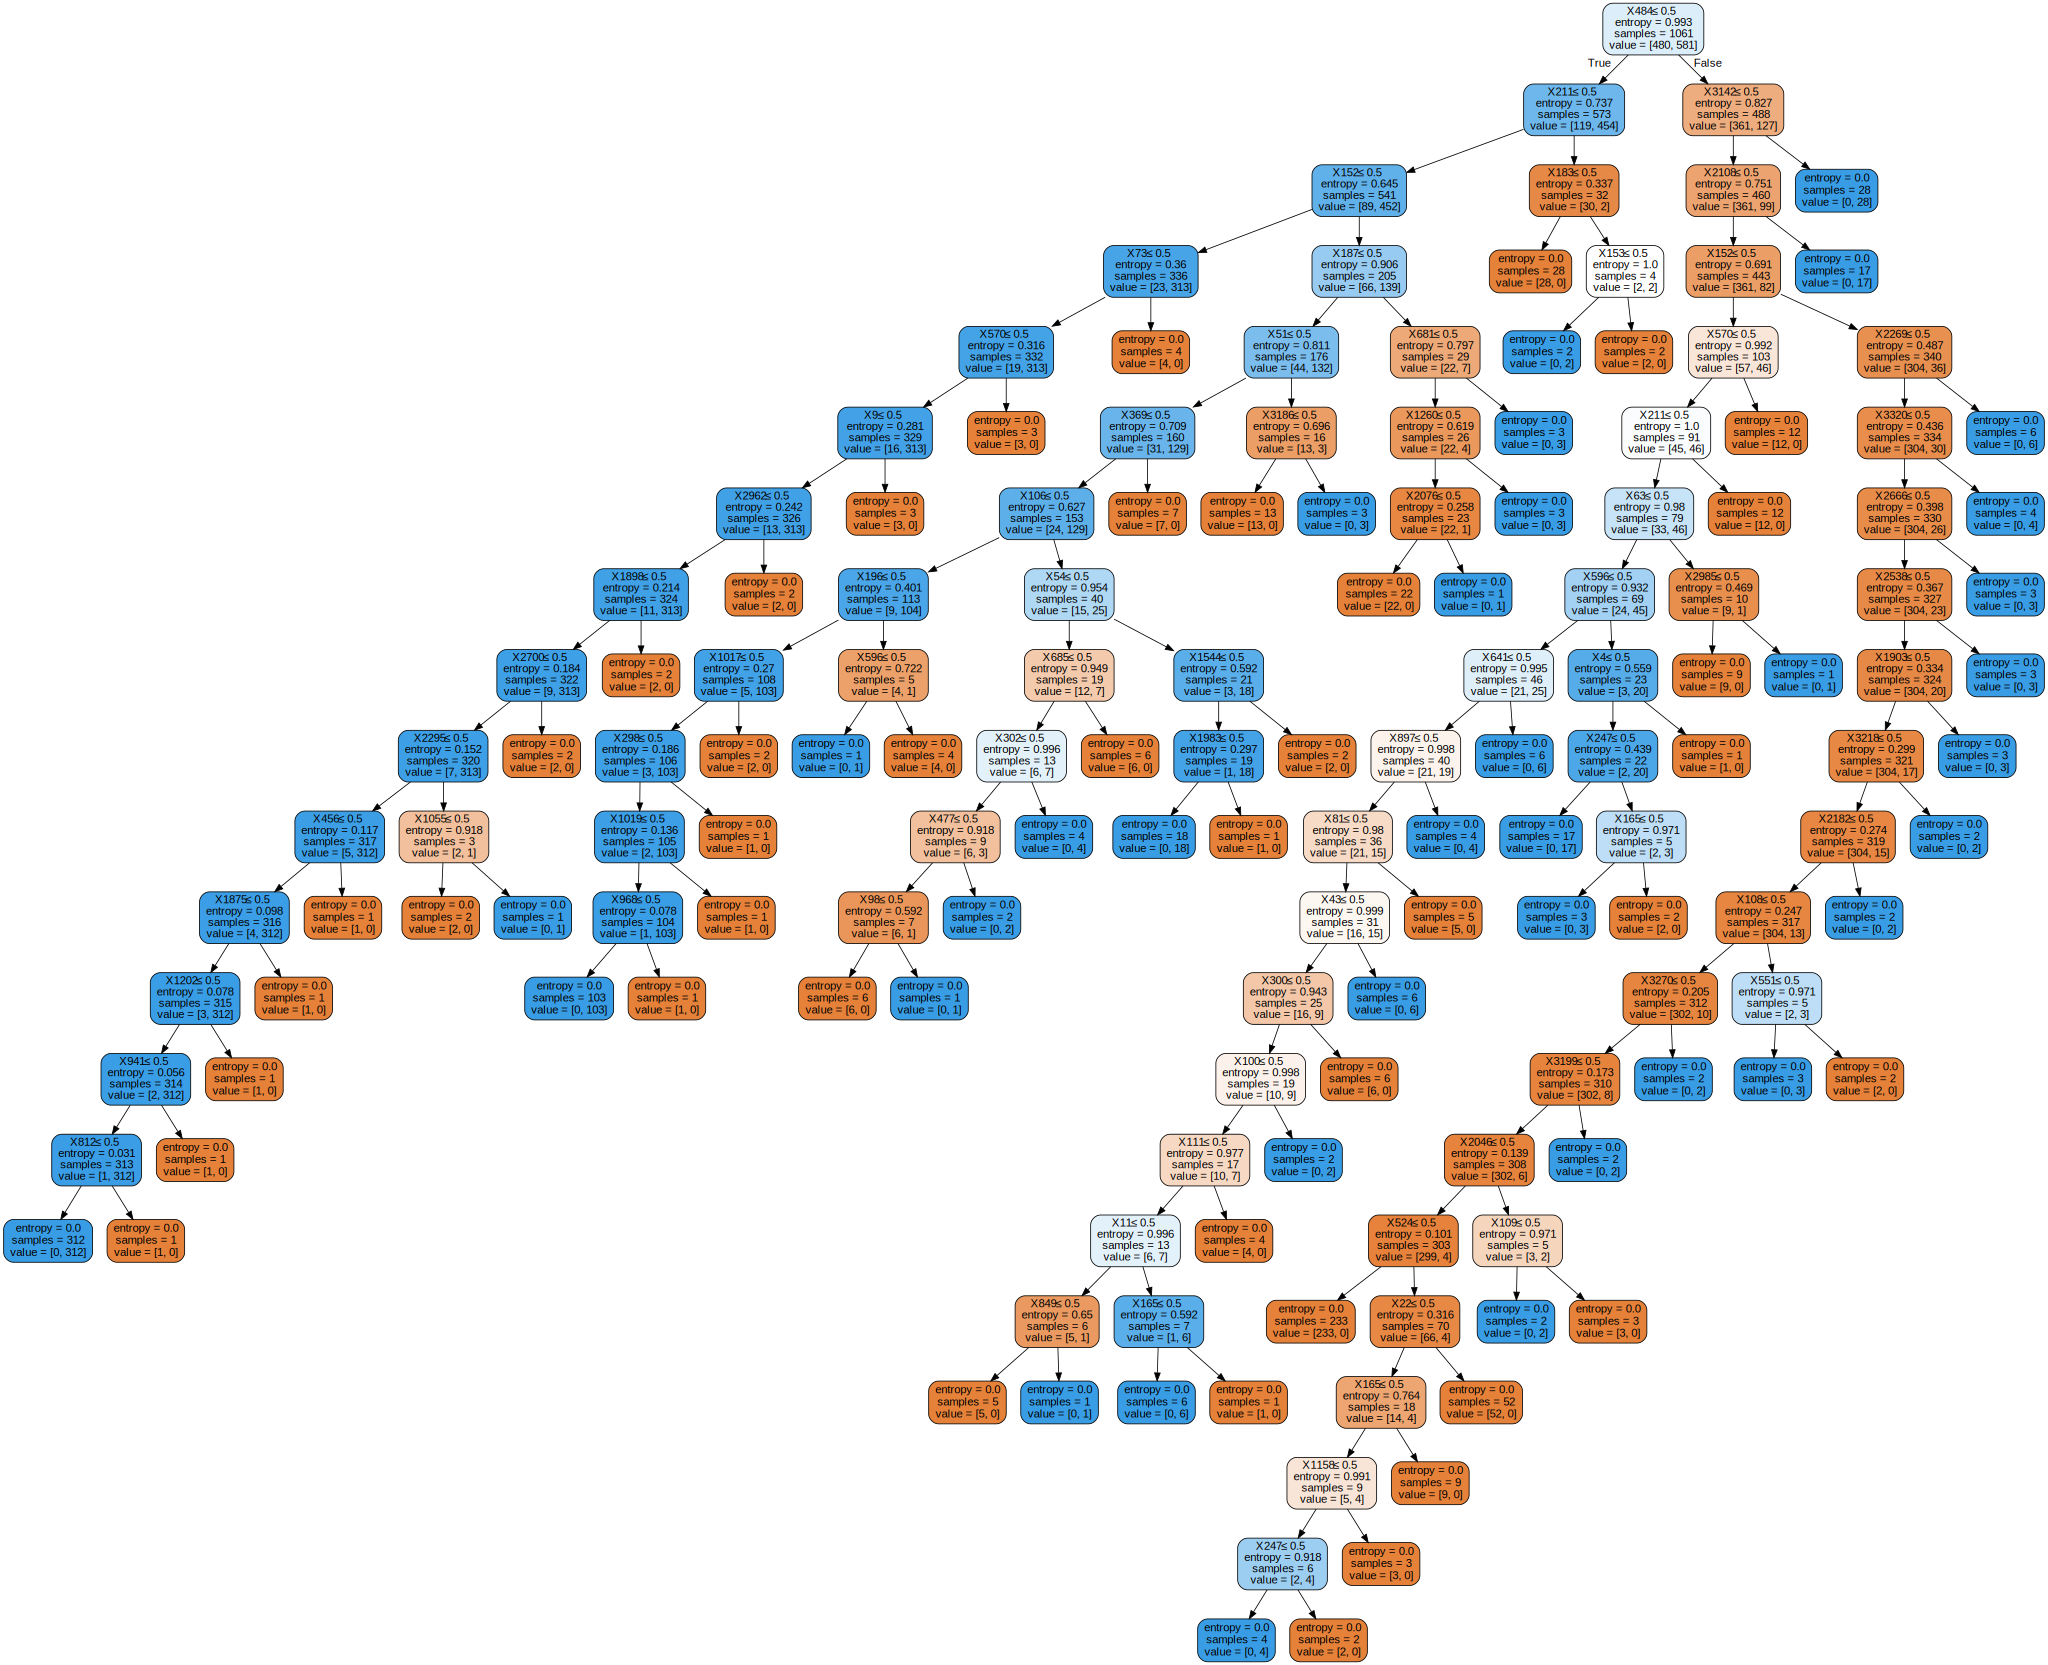

In [93]:
graph